# **1. SIMPLE LINEAR REGRESSION**

- The dataset is available at Kaggle: [Student score (Suitable for linear regression)](https://www.kaggle.com/datasets/snmahsa/student-score-suitable-for-linear-regression)

- **Key Assumptions:**

  - **Linearity**: A linear relationship exists between the independent and dependent variables.
  - **Independence**: Residuals (errors) are independent of each other.
  - **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variables.
  - **Normality of residuals**: Residuals are normally distributed.
  - **No multicollinearity**: Independent variables are not highly correlated with each other.

In [30]:
# Import libaries
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import boxcox
import scipy.stats as stats
from statsmodels.graphics.regressionplots import abline_plot
import statsmodels.formula.api as smf

In [31]:
# Upload the file to Google Colab
uploaded = files. upload()

Saving rounded_hours_student_scores.csv to rounded_hours_student_scores (2).csv


## A. Load the dataset

In [32]:
# Read the file
df = pd.read_csv('rounded_hours_student_scores.csv')
df.head()

,Hours,Scores
0,1.1,41
1,1.2,40
2,1.4,38
3,1.5,39
4,1.6,36


## B. Understand the dataset

In [33]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   60 non-null     float64
 1   Scores  60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [34]:
# Check for missing values
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [35]:
# Basic statistics
print(df.describe())

           Hours     Scores
count  60.000000  60.000000
mean    5.150000  46.433333
std     2.402365   5.699737
min     1.100000  36.000000
25%     3.150000  41.000000
50%     5.150000  47.000000
75%     7.150000  50.000000
max     9.200000  65.000000


## C. Exploratory Data Analysis




Fig.1 Histogram, Correlation, and Scatter Plot Graph Matrix For Independent Variables and Dependent Variable 



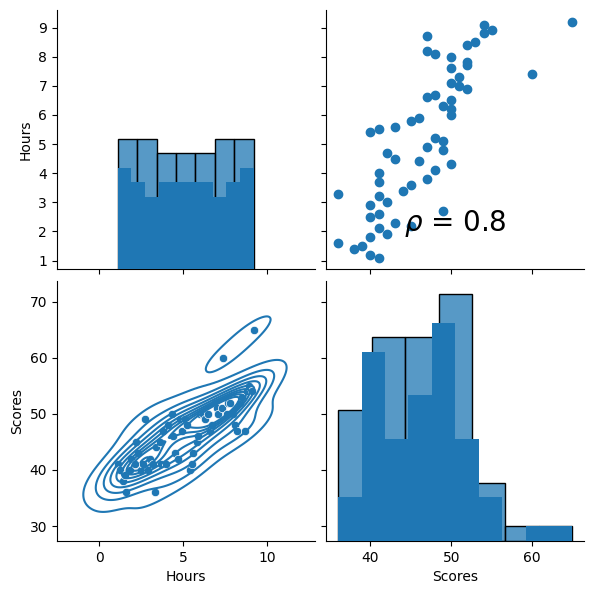

In [36]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
  # Calculate the value
  coef = np.corrcoef(x, y)[0][1]
  # Make the label
  label = r"$\rho$ = " + str(round(coef, 2))
  # Add the label to the plot
  ax = plt.gca()
  ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

print("Fig.1 Histogram, Correlation, and Scatter Plot Graph Matrix For Independent Variables and Dependent Variable \n")
# Create the default pairplot
grid = sns.pairplot(df, vars=["Hours",'Scores'], height=3)
# Map a scatter plot and Pearson correlation coefficient to the upper triangle
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist)
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

- The scatter plot shows that there is linear relationship between the independent and dependent variables. Additionally, there are extreme values which need to be further inspected.

- The correlation graph shows that the exam scores has high correlation to study hours.



## D. Simple Linear Regression for Study Hours vs. Score

$\text{Scores} = \beta_0 + \beta_1 \text{Hours}$

where:

- $\beta_0$ and $\beta_1$ are parameters.




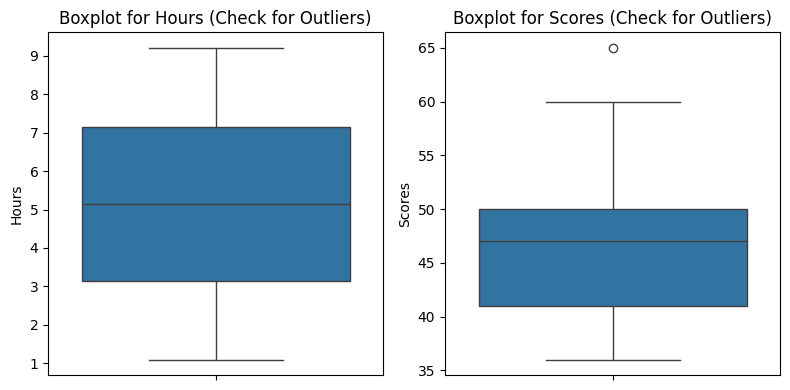

In [37]:
# Step 1: Box-plot visualization
# Create subplots: number of rows and columns
num_cols = len(df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(8, 4))  # Adjust the size as needed

# Loop through each column and create a box plot in the subplots
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot for {column} (Check for Outliers)")

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [38]:
# Step 2: Independent and Dependent Variables
X = df['Hours']
y = df['Scores']

# Divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Fitting the model
X_train = sm.add_constant(X_train)
linear_model = sm.OLS(y_train,X_train)
results = linear_model.fit()
print('\n Linear Regression Result for Hours vs. Score:')
results.summary()


 Linear Regression Result for Hours vs. Score:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     67.15
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.53e-10
Time:                        13:25:48   Log-Likelihood:                -124.50
No. Observations:                  48   AIC:                             253.0
Df Residuals:                      46   BIC:                             256.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8903      1.166     32.506      0.000      35.544      40.237
Hours          1.6691      0.204      8.194      0.000       1.259       2.079
==============================================================================
Omnibus:                        2.516   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.778
Skew:                           0.036   Prob(JB):                        0.411
Kurtosis:                       3.940   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The absolute **t-value** of Hours is greater than the critical value (a 95% confidence level); therefore, it can be said that the predictor is considered statistically significant.

- The **estimate** for Hours is 1.6691. It means when hours of studying increases by 0.01 (1%), exam scores will increase by 0.16691 (1.6691%).

- **R-squared**: The $R^2$ is 0.593. This implies that the change in study hours can explain 59.3% of the change in exam scores.

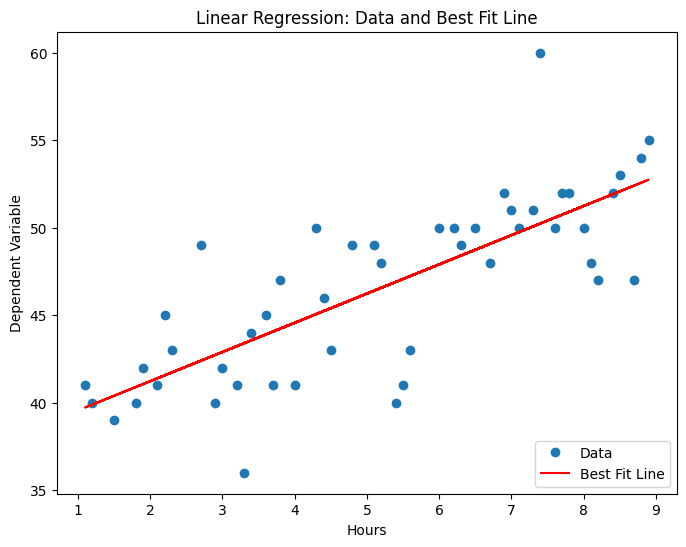

In [39]:
# line of fit
plt.figure(figsize=(8, 6))
plt.plot(X_train['Hours'], y_train, "o",  label='Data') # scatterplot
(a, b) = np.polyfit(X_train['Hours'], y_train, 1)
plt.plot(X_train['Hours'], a * X_train['Hours'] + b, "r-", label="Best Fit Line")
plt.xlabel('Hours')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression: Data and Best Fit Line')
plt.legend(loc="lower right")
plt.show()

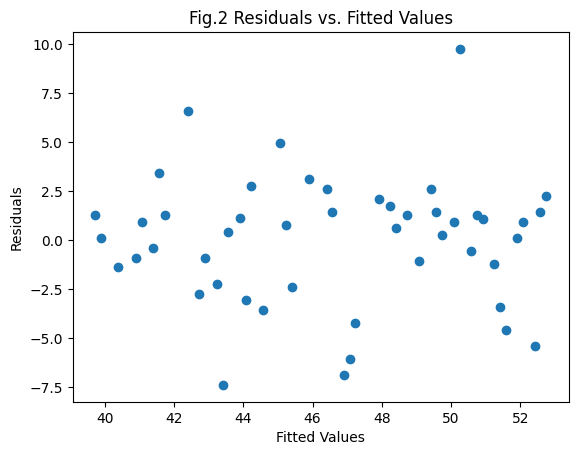

In [40]:
# Step 3: Visual Inspection (Residual Plots)
# Get residuals
residuals = results.resid

# Scatter plot of residuals vs. fitted values
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fig.2 Residuals vs. Fitted Values")
plt.show()

- Fig.2 shows that the residuals are randomly scattered with no apparent structure.

In [41]:
# Step 4: Perform Breusch-Pagan test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(results.resid, results.model.exog)
pd.DataFrame(test, index=name, columns=[""])

,
Lagrange multiplier statistic,0.167557
p-value,0.682292
f-value,0.161138
f p-value,0.689970


- The test result from the above table confirms the non-existence of heteroskedasticity because the p-value is greater than 0.05.


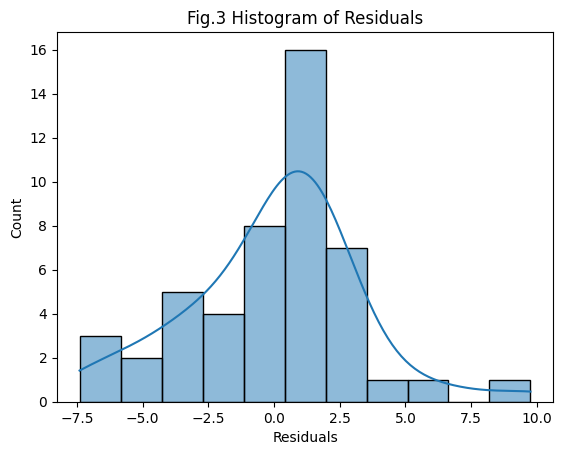

In [42]:
# Step 5: Histogram
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Fig.3 Histogram of Residuals")
plt.show()

- Fig.3 exhibits a left-skewed distribution.


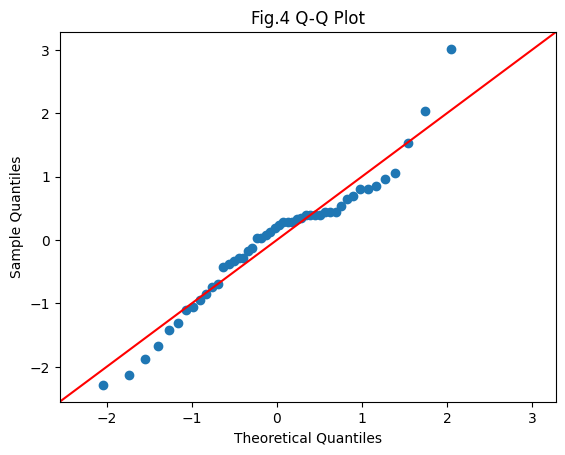

In [43]:
# Visualize normality with Q-Q (Quantile-Quantile) Plot
sm.qqplot(residuals, stats.norm, fit=True, line="45")
plt.title("Fig.4 Q-Q Plot")
plt.show()

- If points lie on the 45-degree line, residuals are normally distributed.

- If points deviate significantly, residuals are not normal.

In [44]:
# Step 4: Make Prediction
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# Store Prediction
df_prediction = pd.DataFrame({'Hours': X_test['Hours'] ,'Actual': y_test, 'Predicted': np.round(y_pred)})
df_prediction

,Hours,Actual,Predicted
26,4.7,42,46.0
35,5.9,46,48.0
59,9.2,65,53.0
28,4.9,47,46.0
11,2.6,41,42.0
2,1.4,38,40.0
34,5.8,45,48.0
58,9.1,54,53.0
40,6.6,47,49.0
22,4.1,48,45.0


In [76]:
# Step 5: Evaluation metrics
mse = (mean_squared_error(y_test, y_pred))
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

# Store evaluation result
evaluation_df = pd.DataFrame({'MSE': mse, 'RMSE': rmse, 'R2': r2}, index=['OLS'])
np.round(evaluation_df,2)

,MSE,RMSE,R2
OLS,17.44,4.18,0.69


In [63]:
# Step 6: Test with own data
hours = pd.DataFrame({'Const': 1, 'Own_Hours': 10}, index=[0])
hours['Predicted_Exam_Score_OLS'] = results.predict(hours)
np.round(hours)

,Const,Own_Hours,Predicted_Exam_Score_OLS
0,1,10,55.0


# **2. Weighted Least Square Regression**

In [59]:
# Step 1: Robust Regression model
rr_huber = sm.RLM(y_train,X_train, M=sm.robust.norms.HuberT())
rr_huber_results = rr_huber.fit()
print('Robust Regression model for Hours vs. Score:')
rr_huber_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                 Scores   No. Observations:                   48
Model:                            RLM   Df Residuals:                       46
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 05 Feb 2025                                         
Time:                        13:39:31                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9005      1.028     36.881      0.000      35.886      39.915
Hours          1.6964      0.180      9.447      0.000       1.344       2.048
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

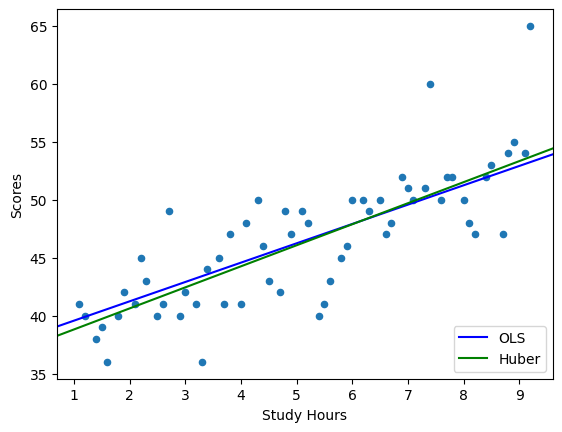

In [58]:
# Step 2: Visualize residual data
scatt = df.plot(x="Hours", y="Scores", kind="scatter")
scatt.set(xlabel="Study Hours", ylabel="Scores")

# Plot regression lines
abline_plot(model_results=results, ax=scatt, color="blue", label="OLS")
abline_plot(model_results=rr_huber_results, ax=scatt, color="green",label="Robust")
plt.legend(loc="lower right")
plt.show()

In [60]:
# Step 3: Make Prediction
y_pred_robust = rr_huber_results.predict(X_test)

# Store Prediction
df_prediction_robust = pd.DataFrame({'Hours': X_test['Hours'] ,'Actual': y_test, 'Predicted': np.round(y_pred_robust)})
df_prediction_robust

,Hours,Actual,Predicted
26,4.7,42,46.0
35,5.9,46,48.0
59,9.2,65,54.0
28,4.9,47,46.0
11,2.6,41,42.0
2,1.4,38,40.0
34,5.8,45,48.0
58,9.1,54,53.0
40,6.6,47,49.0
22,4.1,48,45.0


In [81]:
# Step 4: Evaluation metrics
mse_robust = (mean_squared_error(y_test, y_pred_robust))
rmse_robust = (np.sqrt(mean_squared_error(y_test, y_pred_robust)))
r2_robust = r2_score(y_test, y_pred_robust)

# Store result
evaluation_df.loc['WLS'] = [mse_robust, rmse_robust, r2_robust]
np.round(evaluation_df,3)

,MSE,RMSE,R2
OLS,17.441,4.176,0.689
WLS,17.196,4.147,0.693


- There is a small improvement in predictions based on evaluation metrics as the errors decrease a little bit.

In [82]:
# Step 5: Test with own data
hours['Predicted_Exam_Score_Robust'] = rr_huber_results.predict(hours.iloc[:,0:2])
np.round(hours,2)

,Const,Own_Hours,Predicted_Exam_Score_OLS,Predicted_Exam_Score_Robust
0,1,10,54.58,54.86
